<a href="https://colab.research.google.com/github/mli77/fourier/blob/main/Fourier_decomposition_of_stock_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install yfinance
!pip install matplotlib

Download AAPL price historic and display the chart

[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.953888   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.669983   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.943985   
2022-01-06  172.699997  175.300003  171.639999  172.000000  170.056961   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.225052   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  


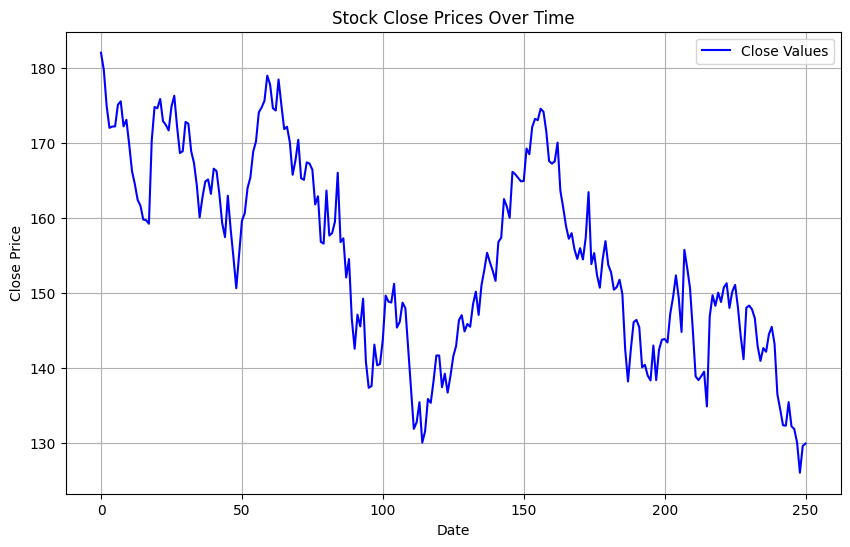

In [6]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the stock symbol and date range
stock_symbol = "AAPL"  # Replace with the desired stock symbol
start_date = "2022-01-01"
end_date = "2022-12-31"

# Download historical data
historical_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the downloaded data
print(historical_data.head())

# Close
close_values = historical_data['Close'].values

# Plot the close values
plt.figure(figsize=(10, 6))
plt.plot(close_values, label='Close Values', color='blue')
plt.title('Stock Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


Fourier series decomposition

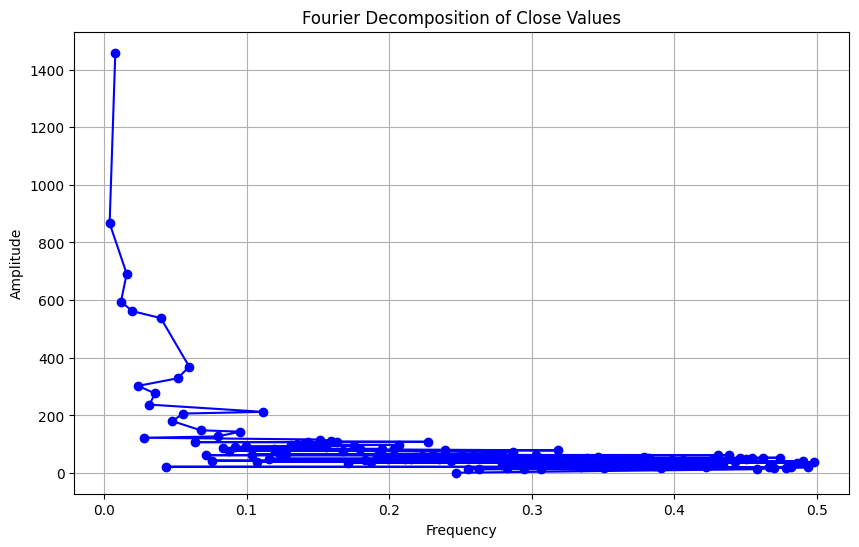

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Function to decompose the close values using Fourier series
# Function to decompose the signal into sinusoidal components
def decompose_fourier(signal):
    n = len(signal)
    fft_values = np.fft.fft(signal)
    fft_freq = np.fft.fftfreq(n)

    # Keep only positive frequencies
    positive_freq_mask = fft_freq > 0
    fft_values = fft_values[positive_freq_mask]
    fft_freq = fft_freq[positive_freq_mask]

    # Sort frequencies and corresponding values by amplitude
    sorted_indices = np.argsort(np.abs(fft_values))[::-1]
    sorted_freq = fft_freq[sorted_indices]
    sorted_amplitude = np.abs(fft_values[sorted_indices])

    return sorted_freq, sorted_amplitude, fft_values, fft_freq

# Decompose close values using Fourier series
freq, amplitude, fft_values, fft_freq = decompose_fourier(close_values)

# Plot the amplitudes of different frequencies
plt.figure(figsize=(10, 6))
plt.plot(freq, amplitude, marker='o', linestyle='-', color='b')
plt.title('Fourier Decomposition of Close Values')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


Reconstructing the curve from sinusoids

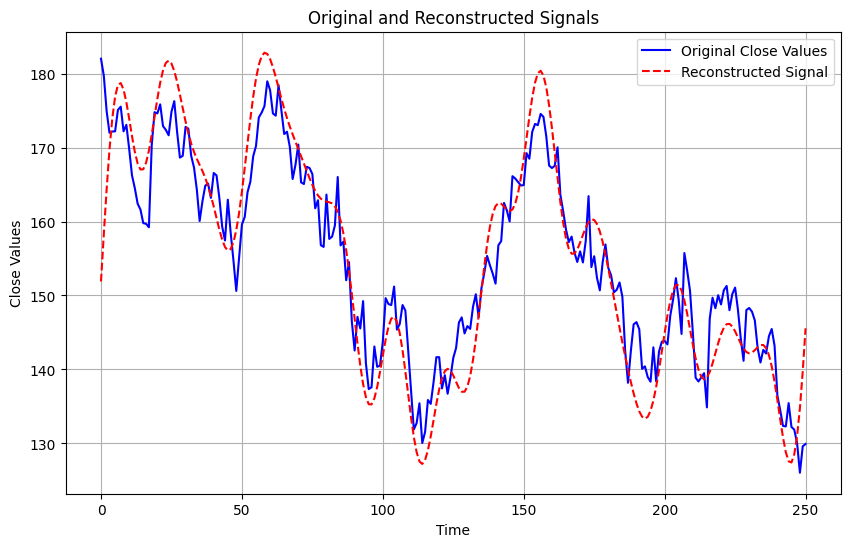

In [19]:
# Function to reconstruct the signal from sinusoidal components
def reconstruct_signal(freq, amplitude, n, fft_values, fft_freq, original_mean, original_diff):
    reconstructed_signal = np.zeros(n)
    for f, a in zip(freq, amplitude):
        phase = np.angle(fft_values[fft_freq == f][0])
        reconstructed_signal += a * np.cos(2 * np.pi * f * np.arange(n) + phase)

    # Adjust amplitude based on original range and add the mean value
    reconstructed_signal = (reconstructed_signal / np.max(np.abs(reconstructed_signal))) * (original_diff / 2) + original_mean

    return reconstructed_signal

# Reconstruct the signal using dominant frequencies
n = len(close_values)
original_mean = np.mean(close_values)
original_diff = np.max(close_values) - np.min(close_values)
reconstructed_signal = reconstruct_signal(freq[:10], amplitude[:10], n, fft_values, fft_freq, original_mean, original_diff)

# Plot the original and reconstructed signals
plt.figure(figsize=(10, 6))
plt.plot(close_values, label='Original Close Values', color='blue')
plt.plot(reconstructed_signal, label='Reconstructed Signal', linestyle='--', color='red')
plt.title('Original and Reconstructed Signals')
plt.xlabel('Time')
plt.ylabel('Close Values')
plt.legend()
plt.grid(True)
plt.show()

Create moving averages corresponding to the frequencies

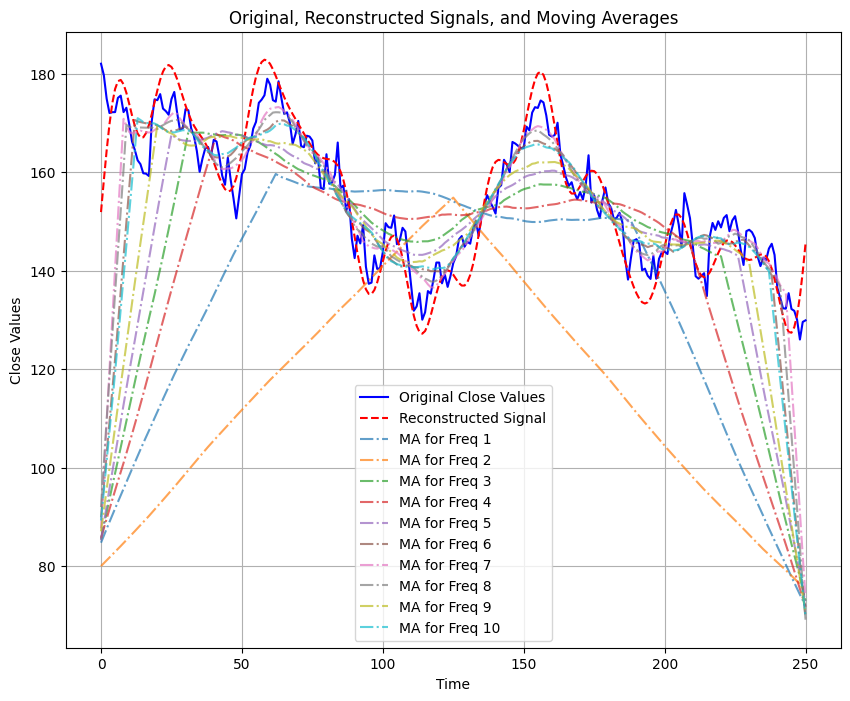

In [20]:
# Function to create moving averages for each dominant frequency
def create_frequency_ma(freq, n, original_data):
    mas = []
    for f in freq:
        period = int(1 / f)  # Calculate period based on frequency
        ma = np.convolve(original_data, np.ones((period,))/period, mode='same')
        mas.append(ma)
    return mas

# Reconstruct the signal using dominant frequencies
n = len(close_values)
original_mean = np.mean(close_values)
original_diff = np.max(close_values) - np.min(close_values)
reconstructed_signal = reconstruct_signal(freq[:10], amplitude[:10], n, fft_values, fft_freq, original_mean, original_diff)

# Create moving averages for each dominant frequency
mas = create_frequency_ma(freq[:10], n, close_values)

# Plot the original, reconstructed signals, and moving averages
plt.figure(figsize=(10, 8))
plt.plot(close_values, label='Original Close Values', color='blue')
plt.plot(reconstructed_signal, label='Reconstructed Signal', linestyle='--', color='red')
for i, ma in enumerate(mas):
    plt.plot(ma, label=f'MA for Freq {i+1}', linestyle='-.', alpha=0.7)

plt.title('Original, Reconstructed Signals, and Moving Averages')
plt.xlabel('Time')
plt.ylabel('Close Values')
plt.legend()
plt.grid(True)
plt.show()